# Геометрическая вероятность — метод Монте-Карло

## Задача

В квадрате со стороной $a$ расположен круг радиуса $r = \frac{a}{2}$,
вписанный в квадрат.

Случайная точка равновероятно выбирается внутри квадрата.

Найти вероятность того, что точка попадёт внутрь круга.


## Теоретическое решение

Площадь квадрата:
$$
S_{\text{кв}} = a^2
$$

Площадь круга:
$$
S_{\text{кр}} = \pi r^2 = \pi \left(\frac{a}{2}\right)^2
$$

Геометрическая вероятность:
$$
P = \frac{S_{\text{кр}}}{S_{\text{кв}}}
   = \frac{\pi a^2 / 4}{a^2}
   = \frac{\pi}{4}
$$


## Метод Монте-Карло

Сгенерируем большое количество случайных точек
равномерно распределённых в квадрате.

Экспериментальная вероятность определяется как
отношение числа точек, попавших в круг,
к общему числу точек.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle


In [ ]:
a = 10          
r = a / 2       
N = 1000        


In [ ]:
x = np.random.uniform(0, a, N)
y = np.random.uniform(0, a, N)

cx, cy = a / 2, a / 2

inside = (x - cx)**2 + (y - cy)**2 <= r**2
hits = inside.sum()


In [4]:
P_exp = hits / N
P_theory = np.pi / 4

P_theory, P_exp


(0.7853981633974483, np.float64(0.786))

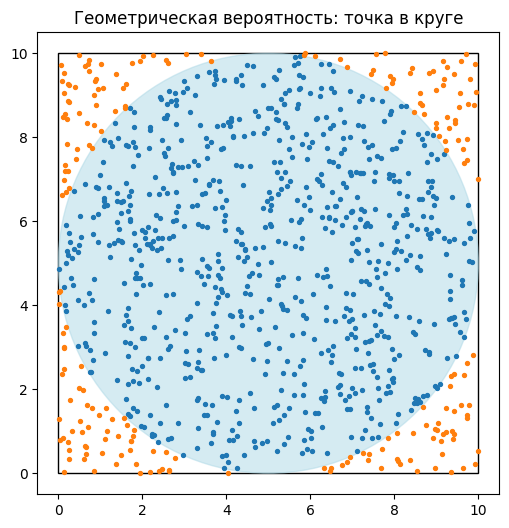

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.add_patch(Rectangle((0, 0), a, a, fill=False))

ax.add_patch(Circle((cx, cy), r, color='lightblue', alpha=0.5))

ax.scatter(x[inside], y[inside], s=8)
ax.scatter(x[~inside], y[~inside], s=8)

ax.set_aspect('equal')
ax.set_title('Геометрическая вероятность: точка в круге')
plt.show()


## Вывод

Экспериментальная вероятность,
полученная методом Монте-Карло,
приближается к теоретической вероятности
при увеличении числа испытаний $N$.

Это подтверждает корректность метода Монте-Карло
для оценки геометрических вероятностей.
